# **MI PROYECTO**


## **FASE 1**

### Se identifico como varables clave las columnas del siguiente dataframe

In [64]:
import pandas as pd
data=pd.read_csv('datset.csv')

data

,ORDEN,CLASE,MARCA,MODELO,FECHA MATRICULA/RADICACION,AÑO,MES,DIA
0,1,MOTOCICLETA,YAMAHA,2000,02/02/2000,2000,02.febrero,02.miércoles
1,2,MOTOCICLETA,SUZUKI,2000,23/02/2000,2000,02.febrero,23.miércoles
2,3,MOTOCICLETA,AUTECO KAWASAKI,2000,25/09/2000,2000,09.septiembre,25.lunes
3,4,AUTOMOVIL,RENAULT,1988,18/09/2000,2000,09.septiembre,18.lunes
4,5,CAMIONETA,CHEVROLET,1988,24/03/2000,2000,03.marzo,24.viernes
...,...,...,...,...,...,...,...,...
16938,16939,MOTOCICLETA,BAJAJ,2022,21/01/2022,2022,01.enero,21.viernes
16939,16940,MOTOCICLETA,VICTORY,2022,27/01/2022,2022,01.enero,27.jueves
16940,16941,MOTOCICLETA,BAJAJ,2022,25/01/2022,2022,01.enero,25.martes
16941,16942,MOTOCICLETA,BAJAJ,2022,28/01/2022,2022,01.enero,28.viernes


## **FASE 2**

### Se realizara la limpieza correspondiente

In [65]:
print(data.isnull().sum())


ORDEN                         0
CLASE                         0
MARCA                         0
MODELO                        0
FECHA MATRICULA/RADICACION    0
AÑO                           0
MES                           0
DIA                           0
dtype: int64


In [66]:
falta=data[data.isnull().any(axis=1)] 

falta

,ORDEN,CLASE,MARCA,MODELO,FECHA MATRICULA/RADICACION,AÑO,MES,DIA


### se realizo el respectivo ajuste de formatos

In [85]:

data['mes_num'] = data['MES'].str.extract(r'(\d{2})')
data['dia_num'] = data['DIA'].str.extract(r'(\d{2})')


data['fecha_ajustada'] = pd.to_datetime(
    data['AÑO'].astype(str) + '-' +
    data['mes_num'] + '-' +
    data['dia_num'],
    errors='coerce'
)

data['FECHA MATRICULA/RADICACION'] = data['fecha_ajustada']

data = data.drop(columns=['mes_num', 'dia_num', 'fecha_ajustada'])

data["FECHA MATRICULA/RADICACION"] = pd.to_datetime(data["FECHA MATRICULA/RADICACION"])

data




,ORDEN,CLASE,MARCA,MODELO,FECHA MATRICULA/RADICACION,AÑO,MES,DIA
0,1,MOTOCICLETA,YAMAHA,2000,2000-02-02,2000,02.febrero,02.miércoles
1,2,MOTOCICLETA,SUZUKI,2000,2000-02-23,2000,02.febrero,23.miércoles
2,3,MOTOCICLETA,AUTECO KAWASAKI,2000,2000-09-25,2000,09.septiembre,25.lunes
3,4,AUTOMOVIL,RENAULT,1988,2000-09-18,2000,09.septiembre,18.lunes
4,5,CAMIONETA,CHEVROLET,1988,2000-03-24,2000,03.marzo,24.viernes
...,...,...,...,...,...,...,...,...
16938,16939,MOTOCICLETA,BAJAJ,2022,2022-01-21,2022,01.enero,21.viernes
16939,16940,MOTOCICLETA,VICTORY,2022,2022-01-27,2022,01.enero,27.jueves
16940,16941,MOTOCICLETA,BAJAJ,2022,2022-01-25,2022,01.enero,25.martes
16941,16942,MOTOCICLETA,BAJAJ,2022,2022-01-28,2022,01.enero,28.viernes


In [68]:
print(data.isnull().sum())

ORDEN                         0
CLASE                         0
MARCA                         0
MODELO                        0
FECHA MATRICULA/RADICACION    0
AÑO                           0
MES                           0
DIA                           0
mes_num                       0
dia_num                       0
fecha_ajustada                0
dtype: int64


## **FASE 3**

In [69]:
data_2=data.loc[:,["CLASE"]]
data_2

,CLASE
0,MOTOCICLETA
1,MOTOCICLETA
2,MOTOCICLETA
3,AUTOMOVIL
4,CAMIONETA
...,...
16938,MOTOCICLETA
16939,MOTOCICLETA
16940,MOTOCICLETA
16941,MOTOCICLETA


In [70]:
import numpy as np

datanp=data_2.to_numpy()
    



In [71]:
clases_unicas, conteos = np.unique(datanp, return_counts=True)
for clase, count in zip(clases_unicas, conteos):
    print(f"{clase}: {count}")

AUTOMOVIL: 3965
BUS: 109
BUSETA: 68
CAMION: 825
CAMIONETA: 1357
CAMPERO: 976
CICLOMOTOR: 3
CUATRIMOTO: 5
MAQUINARIA AGRICOLA: 3
MAQUINARIA INDUSTRIAL: 1
MICROBUS: 115
MINITRACTOR: 1
MOTOCARRO: 50
MOTOCICLETA: 9047
MOTOTRICICLO: 2
REMOLQUE: 20
SEMIREMOQLUE: 6
TRACTO CAMION: 256
VOLQUETA: 134


In [72]:
print(clases_unicas)
print(type(clases_unicas))

['AUTOMOVIL' 'BUS' 'BUSETA' 'CAMION' 'CAMIONETA' 'CAMPERO' 'CICLOMOTOR'
 'CUATRIMOTO' 'MAQUINARIA AGRICOLA' 'MAQUINARIA INDUSTRIAL' 'MICROBUS'
 'MINITRACTOR' 'MOTOCARRO' 'MOTOCICLETA' 'MOTOTRICICLO' 'REMOLQUE'
 'SEMIREMOQLUE' 'TRACTO CAMION' 'VOLQUETA']
<class 'numpy.ndarray'>


In [73]:
print(conteos)

[3965  109   68  825 1357  976    3    5    3    1  115    1   50 9047
    2   20    6  256  134]


In [74]:

df = pd.DataFrame({'VEHICULOS':clases_unicas,'CANTIDAD':conteos})

df

,VEHICULOS,CANTIDAD
0,AUTOMOVIL,3965
1,BUS,109
2,BUSETA,68
3,CAMION,825
4,CAMIONETA,1357
5,CAMPERO,976
6,CICLOMOTOR,3
7,CUATRIMOTO,5
8,MAQUINARIA AGRICOLA,3
9,MAQUINARIA INDUSTRIAL,1


### se mostrara la cantidad de de automoviles que hay por clase

In [75]:
import matplotlib.pyplot as mpl


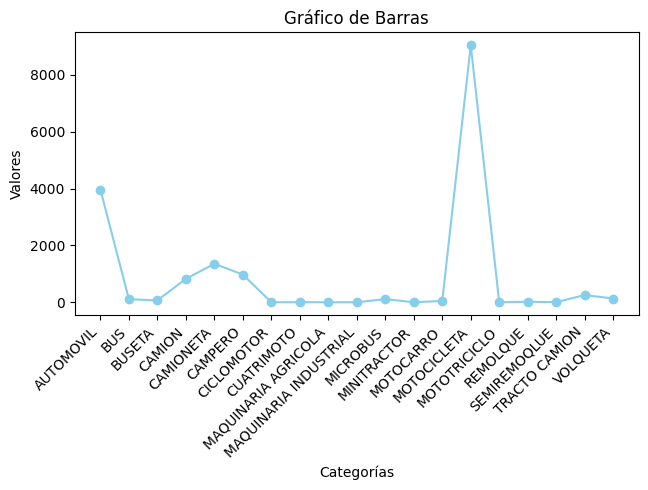

In [76]:
categorias =df['VEHICULOS']
valores = df['CANTIDAD']

mpl.plot(categorias, valores, color='skyblue',marker='o')
mpl.title('Gráfico de Barras')
mpl.xticks(rotation=45, ha='right')
mpl.tight_layout() 
mpl.xlabel('Categorías')
mpl.ylabel('Valores')
mpl.show() 


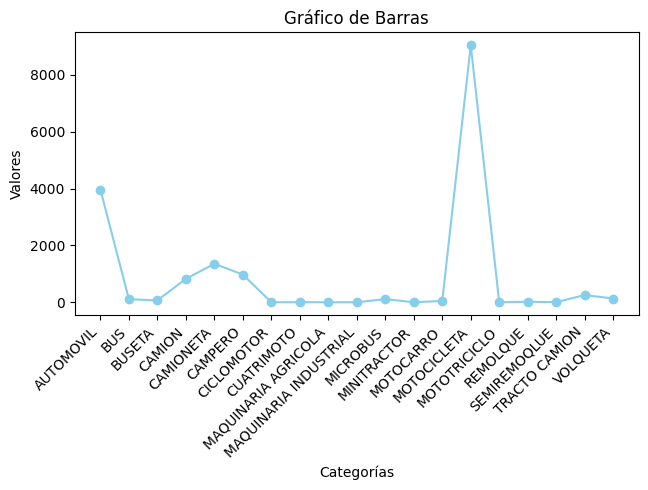

In [77]:
categorias =df['VEHICULOS']
valores = df['CANTIDAD']

mpl.plot(categorias, valores, color='skyblue',marker='o')
mpl.title('Gráfico de Barras')
mpl.xticks(rotation=45, ha='right')
mpl.tight_layout() 
mpl.xlabel('Categorías')
mpl.ylabel('Valores')
mpl.show() 
